In [1]:
# Cell 0 — Install (run, then restart the kernel if prompted)
!pip install geopandas pyproj shapely fiona rtree

  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.5 MB ? eta -:--:--
    --------------------------------------- 0.5/24.5 MB 886.6 kB/s eta 0:00:27
   - -------------------------------------- 0.8/24.5 MB 1.2 MB/s eta 0:00:21
   -- ------------------------------------- 1.3/24.5 MB 1.4 MB/s eta 0:00:17
   --- ------------------------------------ 1.8/24.5 MB 1.6 MB/s eta 0:00:14
   --- ------------------------------------ 2.4/24.5 MB 1.8 MB/s eta 0:00:13
   ----- ---------------------------------- 3.1/24.5 MB 2.1 MB/s eta 0:00:11
   ------ --------------------------------- 3.9/24.5 MB 2.3 MB/s eta 0:00:09
   ------- -------------------------------- 4.5/24.5 MB 2.4 MB/s eta 0:00:09
   --------- ------------------------------ 5.5/24.5 MB 2.6 MB/s eta 0:00:08
   --------- ------------------------------ 6.0/24.5 MB 2.6 MB/s eta 0:00:07
   ----------- -----------

In [3]:
#Cell 1 - Importas and display defaults
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Make DataFrame displays compact and plots appear inline
pd.set_option("display.max_columns", 50)
%matplotlib inline

print("Versions -> goepandas:", gpd.__version__)

Versions -> goepandas: 1.1.1


In [9]:
#List avaialble ample shapefiles using the new geodatasets packate
!pip install geodatasets --quiet

In [ ]:
# List all available datasets from geodatasets
import geodatasets

# geodatsets stores datsets as string keys accessible via get_path(<name>)
available = [d for d in dir(geodatasets.data) if not d.startswith("_")] #this is a loop, "loop over each item in that list and call it d", "if not" is a filter we place on the resulting list to further specify the outcome we want
print("Available Sample Datasets\n:")   #notes these are "namespaces (high-level) and not necessarily the specific name of datasets we can use"
for i, name in enumerate(available, 1):
    print(f"{i}. {name}")

Available Sample Datasets
:
1. abs
2. eea
3. geoda
4. naturalearth
5. ny


In [ ]:
#See what datasets are available within "ny"
import geodatasets

# Explore what’s inside a namespace like "ny", and choose one to download
print(dir(geodatasets.data.ny))

['bb']


In [18]:
#Load a sample shapefile using GeoPandas + geodatasets
from geodatasets import get_path
import geopandas as gpd

#Load nybb dataset
path = get_path("nybb") 
ny = gpd.read_file(path)

print("Rows:", len(ny))
print("CRS:", ny.crs)
ny.head()

Rows: 5
CRS: EPSG:2263


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


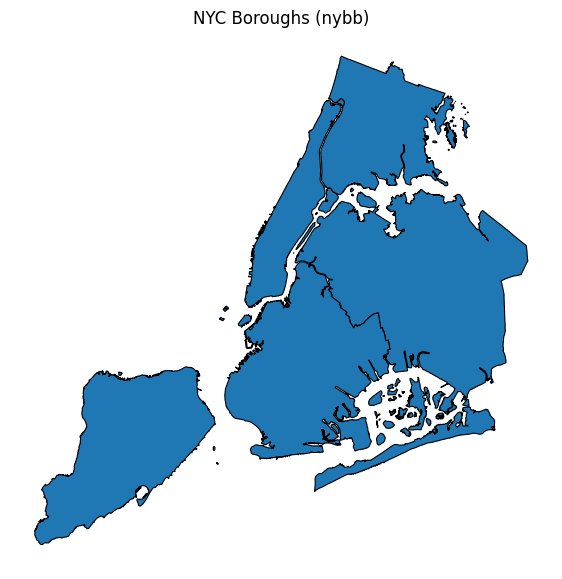

In [ ]:
#Basic Plot of geodataset
ax = ny.plot(figsize=(7,7), edgecolor="black", linewidth=0.8)   #ny here is a variable we set in previous cell, not referring directly to the geodataset "ny"
ax.set_title("NYC Boroughs (nybb)")
ax.set_axis_off()

In [20]:
#Quick attribute peek + geometry info
print("Columns:", list(ny.columns))
print("\nDtypes:\n", ny.dtypes)
print("\nGeometry types:", ny.geom_type.unique())


Columns: ['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry']

Dtypes:
 BoroCode         int32
BoroName        object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

Geometry types: ['MultiPolygon']


In [ ]:
#NaturalEarth geodataset
from geodatasets import get_path
import geopandas as gpd

# Searches for keywords in the "keys" of naturalearth geodatasets
for key in ["naturalearth.countries", "naturalearth.land", "naturalearth.cities"]:
    try:
        p = get_path(key)
        gdf = gpd.read_file(p)
        print(f"Loaded: {key} -> rows={len(gdf)}  crs={gdf.crs}")
        display(gdf.head())
        break
    except Exception as e:
        print(f"Could not load {key}: {e}")


Could not load naturalearth.countries: No matching item found for the query 'naturalearth.countries'.
Loaded: naturalearth.land -> rows=127  crs=EPSG:4326


,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


In [24]:

#Or print the keys of naturalearth geodatasets directly
print(dir(geodatasets.data.naturalearth))

['land']


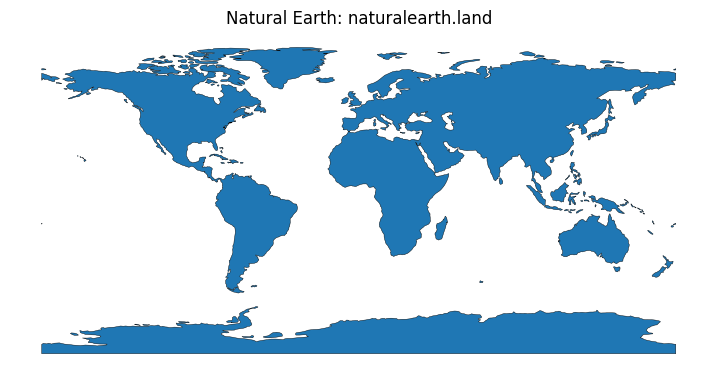

In [ ]:
#Plot naturalearth geodata we found above
ax = gdf.plot(figsize=(9,6), edgecolor="black", linewidth=0.3)  #gdf is variable we saved the key we found searching for specific keywords in the dataset names in previous cell
ax.set_title(f"Natural Earth: {key}")
ax.set_axis_off()


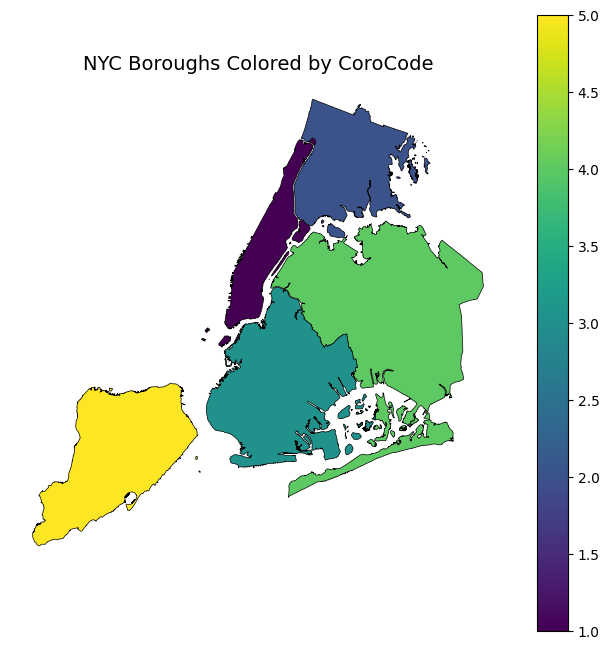

In [27]:
# Color the polygons of NYBB by an attribute
import matplotlib.pyplot as plt

ax = ny.plot(
    column="BoroCode",  #which column to color by
    cmap="viridis",  #color scheme (plasma, Set2, etc.)
    legend=True,    #show legend
    figsize=(8,8),   #figure size
    edgecolor="black",  #outline
    linewidth=0.5
)

ax.set_title("NYC Boroughs Colored by CoroCode", fontsize=14)
ax.set_axis_off()
plt.show()

✅ Map saved successfully at: maps\nybb_boroughs_colored.png


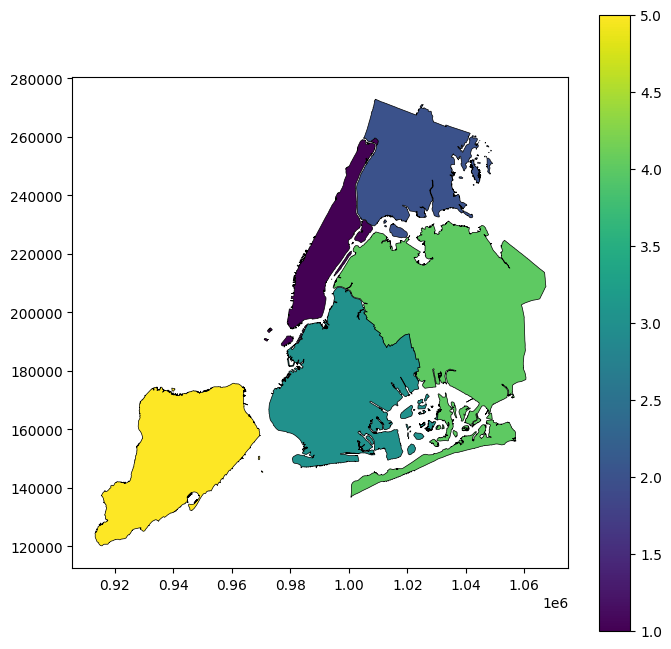

In [ ]:
#Save map to file
import os
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ny.plot(
    column="BoroCode",  #which column to color by
    cmap="viridis",  #color scheme (plasma, Set2, etc.)
    legend=True,    #show legend
    figsize=(8,8),   #figure size
    edgecolor="black",  #outline
    linewidth=0.5
)

ax.set_title("NYC Boroughs Colored by CoroCode", fontsize=14)
ax.set_axis_off()

# Create "maps" directory if it doesn't exist
output_dir = "maps"
os.makedirs(output_dir, exist_ok=True)  #creates folder if doesnt exist

#Save as PNG (in your current working directory)
output_path = os.path.join(output_dir, "nybb_boroughs_colored.png") #builds proper cross-platform path
plt.savefig(output_path, dpi=300, bbox_inches="tight")  #saves high-res figure into that folder
plt.close(fig)

print(f"✅ Map saved successfully at: {output_path}")

In [ ]:
# 🌍 Week 1, Task 5 — Intro to GeoPandas

## ✅ Goals
- Load and explore a shapefile using GeoPandas  
- View attribute data (columns, geometry types, CRS)  
- Plot a basic map and color by an attribute  
- Save the map to file  

---

## 🧭 Summary of Work
In this task, I:
1. Installed and imported GeoPandas and GeoDatasets.  
2. Loaded the sample **NYC boroughs shapefile (`nybb`)** using:
   ```python
   from geodatasets import get_path
   import geopandas as gpd
   ny = gpd.read_file(get_path("nybb"))
